In [1]:
!pip install torch torchvision torchaudio

In [2]:
!wget https://www.insee.fr/fr/statistiques/fichier/7633685/nat2022_csv.zip 

--2025-02-27 12:05:08--  https://www.insee.fr/fr/statistiques/fichier/7633685/nat2022_csv.zip
Resolving www.insee.fr (www.insee.fr)... 143.196.255.163, 194.254.37.163
Connecting to www.insee.fr (www.insee.fr)|143.196.255.163|:443... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [application/zip]
Saving to: ‘nat2022_csv.zip’

nat2022_csv.zip         [    <=>             ]   2,45M  3,76MB/s    in 0,7s    

2025-02-27 12:05:09 (3,76 MB/s) - ‘nat2022_csv.zip’ saved [2571727]



In [3]:
!unzip nat2022_csv.zip
!mv nat2022.csv names.csv

Archive:  nat2022_csv.zip
  inflating: nat2022.csv             


In [4]:
import csv
names = set()
with open("names.csv", "r") as csvfile:
     csvreader = csv.reader(csvfile)
     for row in csvreader:
        name = row[0].split(";")[1]
        if name[0] != "_":
            names.add(name)


In [5]:
alphabet = set()
for name in names:
    for l in name:
        alphabet.add(l)
N = len(alphabet)+1

In [6]:
stoi = {i:k+1 for k,i in enumerate(alphabet)}
stoi['.'] = 0
itos = {k:i for i,k in stoi.items()}

In [7]:
import torch

In [8]:
M = torch.zeros((N,N), dtype=torch.int32)
for name in names:
    chs = ['.']+list(name)+['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        M[idx1,idx2]+=1

(-0.5, 51.5, 51.5, -0.5)

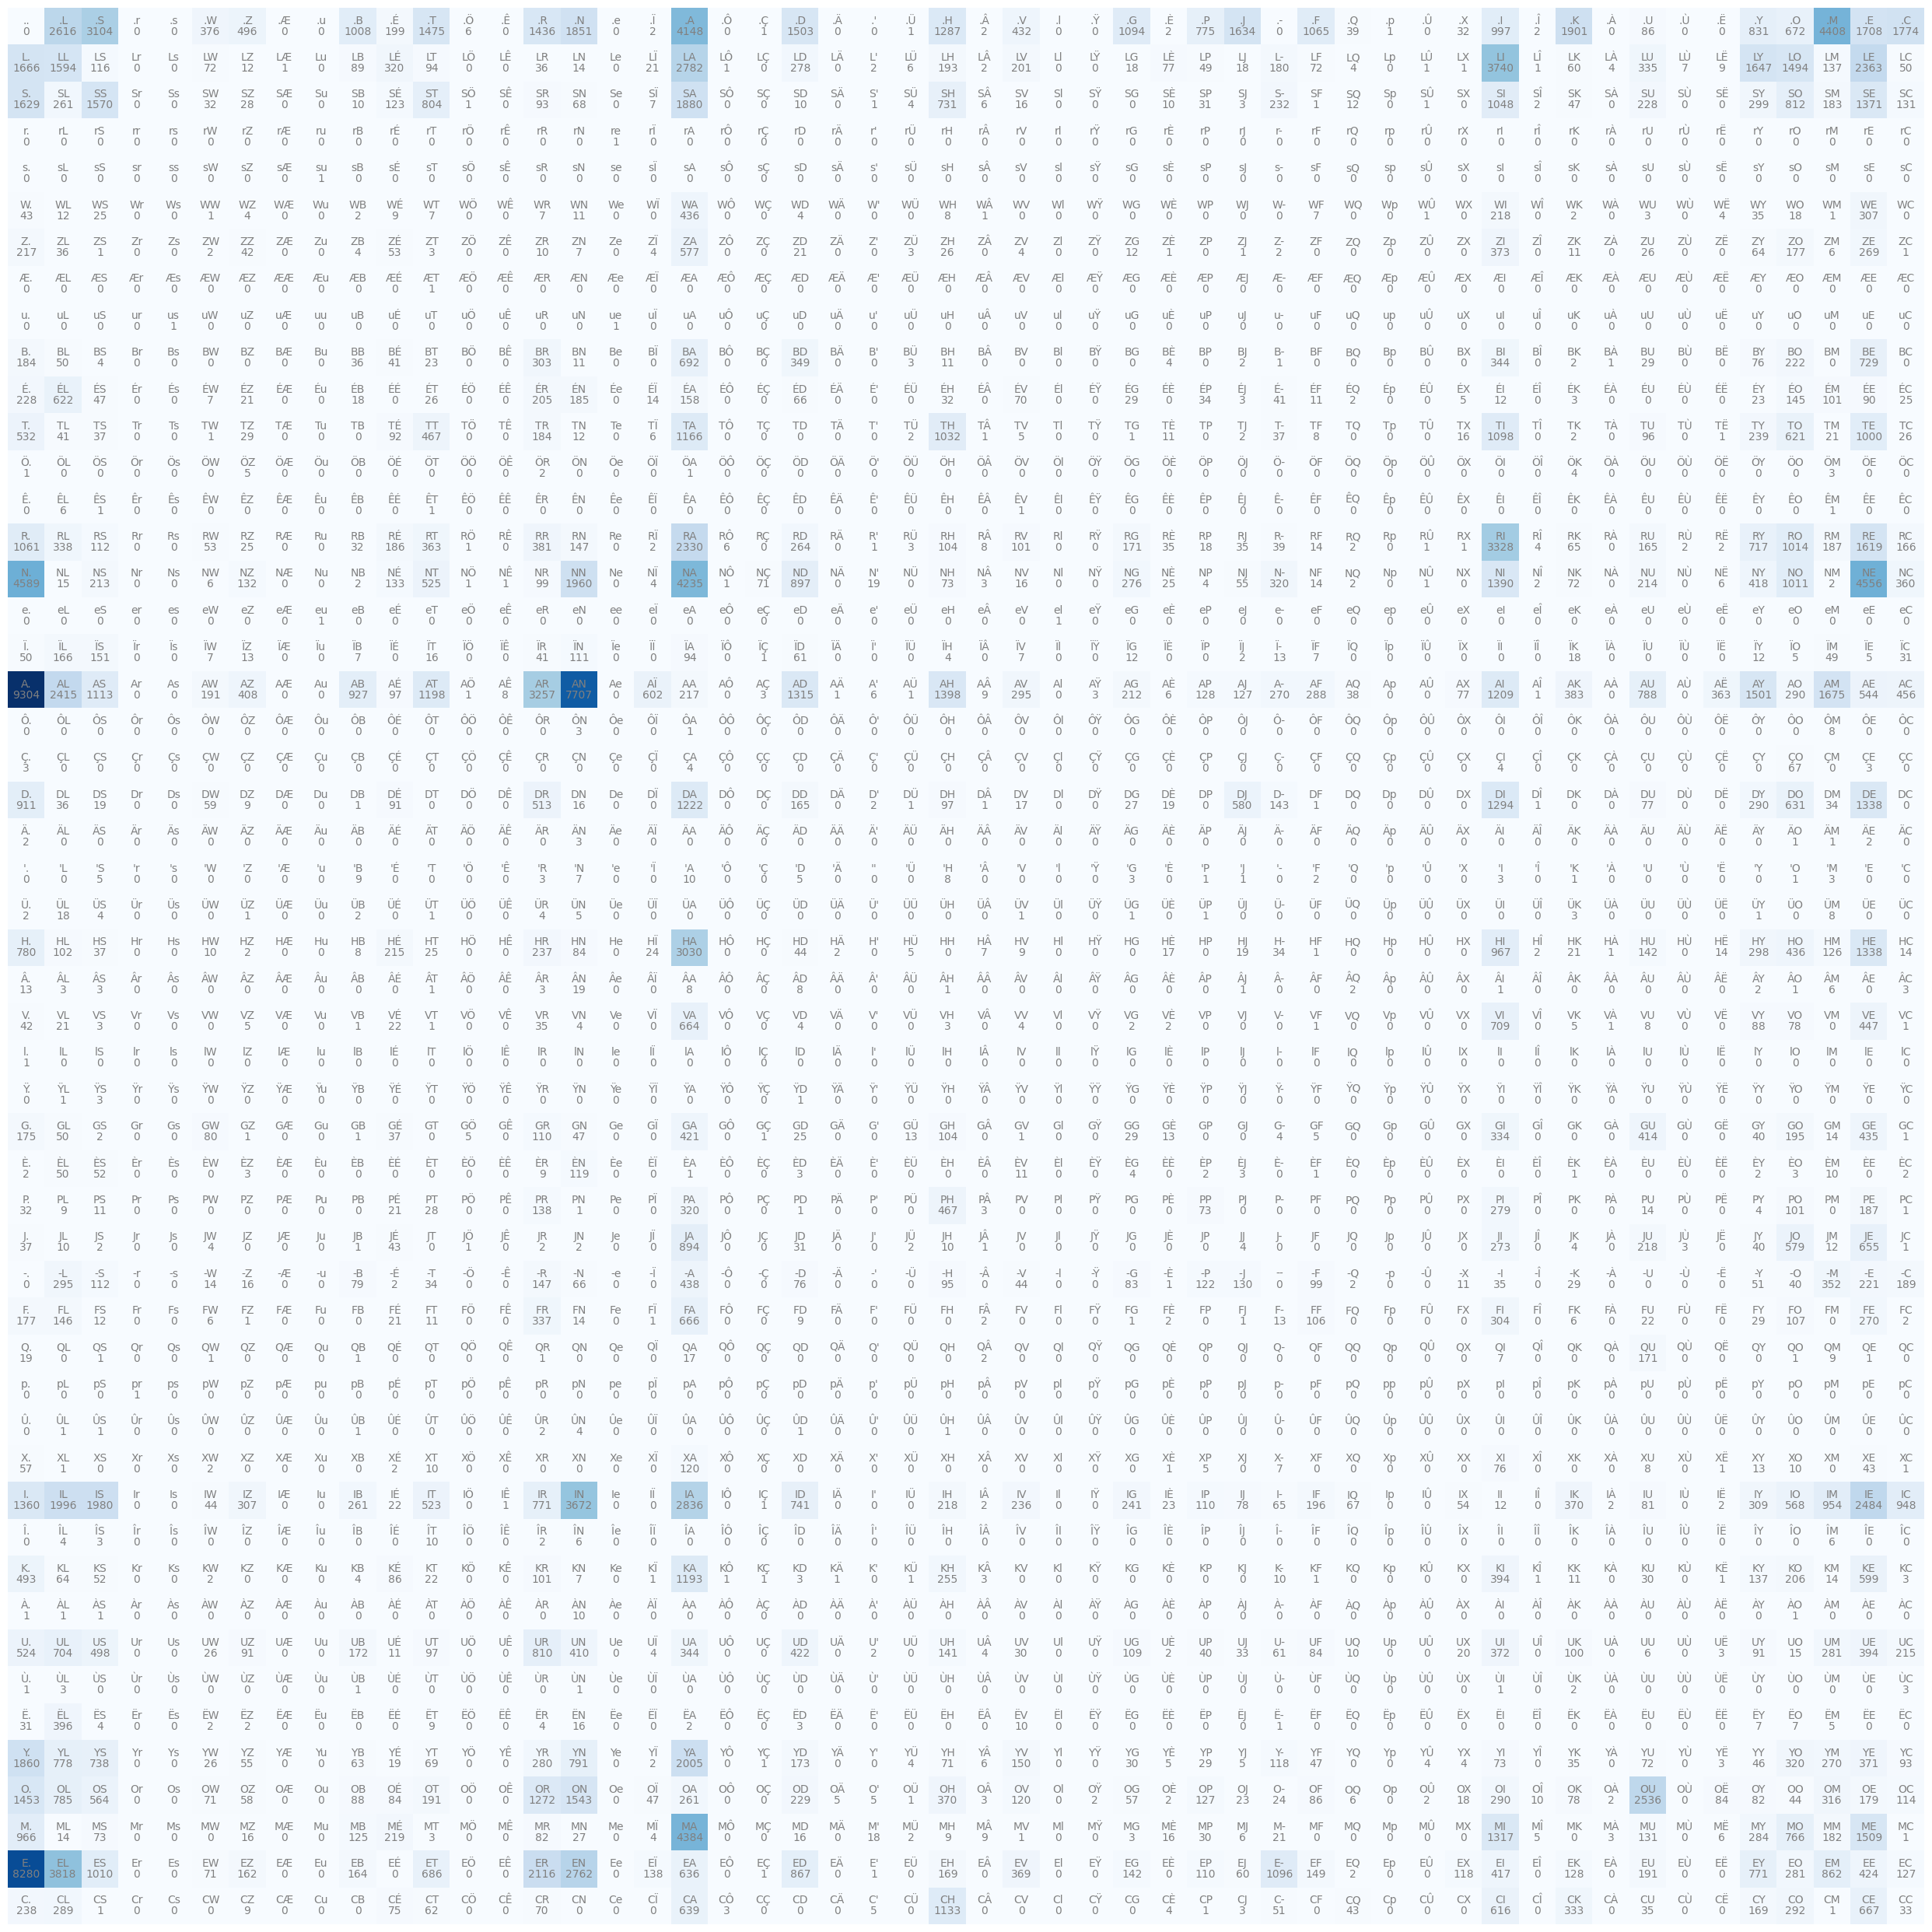

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(32,32))
plt.imshow(M, cmap='Blues')
for i in range(N):
    for j in range(N):
        plt.text(j,i, itos[i]+itos[j], ha='center', va='bottom', color='gray')
        plt.text(j,i, M[i, j].item(), ha='center', va='top',color='gray')
plt.axis('off')

In [10]:
P = (M+1).float()
P /= P.sum(1, keepdim=True)

In [11]:
name = ['.',itos[torch.multinomial(P[0], num_samples=1, replacement=True).item()]]
while name[len(name)-1] != '.':
    last = name[len(name)-1]
    name.append(itos[torch.multinomial(P[stoi[last]], num_samples=1, replacement=True).item()])
print(''.join(name))

.ANAMASE.


# Neural Network

In [12]:
# create training set
xs, ys = [], []
for name in names:
    chs = ['.']+list(name)+['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [13]:
import torch.nn.functional as F
W = torch.randn((N, N), requires_grad=True)

In [14]:
for _ in range(10000):
    xenc = F.one_hot(xs, num_classes=N).float()
    C = (xenc @ W).exp()
    Y = C / C.sum(1, keepdim=True)
    loss = -Y[torch.arange(len(xs)), ys].log().mean()
    W.grad = None
    loss.backward()
    W.data += -50 * W.grad
    print(loss.item())

4.349695682525635
3.9740188121795654
3.7188639640808105
3.537773370742798
3.4009921550750732
3.2969517707824707
3.216069221496582
3.150857448577881
3.0964579582214355
3.04996919631958
3.009650945663452
2.974400043487549
2.9434428215026855
2.9161698818206787
2.8920655250549316
2.8706743717193604
2.8515915870666504
2.8344693183898926
2.819014549255371
2.804988145828247
2.7921955585479736
2.78047776222229
2.769702672958374
2.7597615718841553
2.7505600452423096
2.742018699645996
2.7340691089630127
2.7266509532928467
2.7197132110595703
2.713209390640259
2.7071003913879395
2.7013511657714844
2.6959304809570312
2.690810441970825
2.6859660148620605
2.681375741958618
2.6770198345184326
2.672879934310913
2.668940305709839
2.6651859283447266
2.661604404449463
2.6581828594207764
2.6549103260040283
2.651777505874634
2.6487746238708496
2.6458935737609863
2.643126964569092
2.640467405319214
2.637908935546875
2.6354453563690186
2.6330714225769043
2.63078236579895
2.628573179244995
2.6264398097991943
2

KeyboardInterrupt: 